In [1]:
#!pip install shap

In [1]:
import pandas as pd
#from datetime import timedelta
from pycaret.classification import *
import shap

In [2]:
df = pd.read_parquet('./data/final_clin.parquet')

In [12]:
#df_w_sepsis3 = df

In [3]:
df.columns.tolist()

['stay_id',
 'cluster',
 'subject_id',
 'hadm_id',
 'first_careunit',
 'last_careunit',
 'admission_type',
 'admission_location',
 'insurance',
 'language',
 'marital_status',
 'race',
 'hospital_expire_flag',
 'gender',
 'anchor_age',
 'anchor_year',
 'anchor_year_group',
 'pao2fio2ratio_novent_avg_d1',
 'pao2fio2ratio_vent_avg_d1',
 'rate_epinephrine_avg_d1',
 'rate_norepinephrine_avg_d1',
 'rate_dopamine_avg_d1',
 'rate_dobutamine_avg_d1',
 'platelet_min_d1',
 'creatinine_max_d1',
 'bilirubin_max_d1',
 'respiration_d1',
 'coagulation_d1',
 'liver_d1',
 'cardiovascular_d1',
 'cns_d1',
 'renal_d1',
 'preiculos_d1',
 'preiculos_score_d1',
 'gcs_d1',
 'gcs_score_d1',
 'heartrate_d1',
 'heart_rate_score_d1',
 'meanbp_d1',
 'mbp_score_d1',
 'resprate_d1',
 'resp_rate_score_d1',
 'temp_d1',
 'temp_score_d1',
 'urineoutput_d1',
 'urineoutput_score_d1',
 'mechvent_d1',
 'mechvent_score_d1',
 'electivesurgery_d1',
 'electivesurgery_score_d1',
 'pao2fio2ratio_novent_avg_d2',
 'pao2fio2ratio_ve

In [12]:
df = df[(df.sepsis3 == 1)]

In [13]:
df.count()

stay_id                        15671
cluster                        15671
subject_id                     15671
hadm_id                        15671
first_careunit                 15671
last_careunit                  15671
admission_type                 15671
admission_location             15671
insurance                      15671
language                       15671
marital_status                 15671
race                           15671
hospital_expire_flag           15671
gender                         15671
anchor_age                     15671
anchor_year                    15671
anchor_year_group              15671
pao2fio2ratio_novent_avg_d1     3957
pao2fio2ratio_vent_avg_d1       7458
rate_epinephrine_avg_d1         1006
rate_norepinephrine_avg_d1      5038
rate_dopamine_avg_d1             539
rate_dobutamine_avg_d1           332
platelet_min_d1                15544
creatinine_max_d1              15584
bilirubin_max_d1                8901
respiration_d1                 10756
c

In [14]:
df.drop(['stay_id', 'subject_id', 'hadm_id','sepsis3'], axis=1, inplace=True)

In [15]:
# exp1 = setup(df, target = 'hospital_expire_flag', numeric_features=numerical_variables, categorical_features=categorical_variables, numeric_imputation='median', fix_imbalance=True, session_id=42)
exp2 = setup(df, target = 'hospital_expire_flag', numeric_imputation='median', fix_imbalance=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,hospital_expire_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15671, 113)"
5,Missing Values,True
6,Numeric Features,58
7,Categorical Features,54
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8271,0.8274,0.3997,0.6540,0.4955,0.3986,0.4165,0.5960
gbc,Gradient Boosting Classifier,0.8217,0.8256,0.3470,0.6536,0.4530,0.3583,0.3841,3.0760
xgboost,Extreme Gradient Boosting,0.8195,0.8088,0.4005,0.6176,0.4855,0.3822,0.3955,2.6280
et,Extra Trees Classifier,0.8113,0.7980,0.2491,0.6491,0.3591,0.2737,0.3173,0.5920
rf,Random Forest Classifier,0.8109,0.7976,0.2379,0.6518,0.3477,0.2648,0.3111,0.6040
ada,Ada Boost Classifier,0.8098,0.7977,0.3988,0.5781,0.4718,0.3606,0.3700,0.7120
dummy,Dummy Classifier,0.7869,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0820
lda,Linear Discriminant Analysis,0.7440,0.8112,0.7227,0.4389,0.5461,0.3823,0.4054,0.2350
ridge,Ridge Classifier,0.7437,0.0000,0.7227,0.4386,0.5458,0.3819,0.4051,0.1050
dt,Decision Tree Classifier,0.7363,0.6187,0.4138,0.3880,0.4002,0.2315,0.2318,0.2140


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
# Rank: 1st, AUC
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8377,0.8416,0.4077,0.7037,0.5163,0.4270,0.4500
1,0.8441,0.8334,0.4592,0.7039,0.5558,0.4663,0.4820
2,0.8159,0.8211,0.3547,0.6194,0.4511,0.3501,0.3698
3,0.8250,0.8256,0.3932,0.6479,0.4894,0.3913,0.4091
4,0.8186,0.8126,0.3718,0.6259,0.4665,0.3656,0.3837
5,0.8250,0.8265,0.3846,0.6522,0.4839,0.3868,0.4064
6,0.8350,0.8464,0.4402,0.6732,0.5323,0.4374,0.4520
7,0.8140,0.8233,0.4017,0.5949,0.4796,0.3715,0.3821
8,0.8350,0.8322,0.4402,0.6732,0.5323,0.4374,0.4520


In [41]:
#tuned_lgbm = tune_model(lgbm, optimize='AUC')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


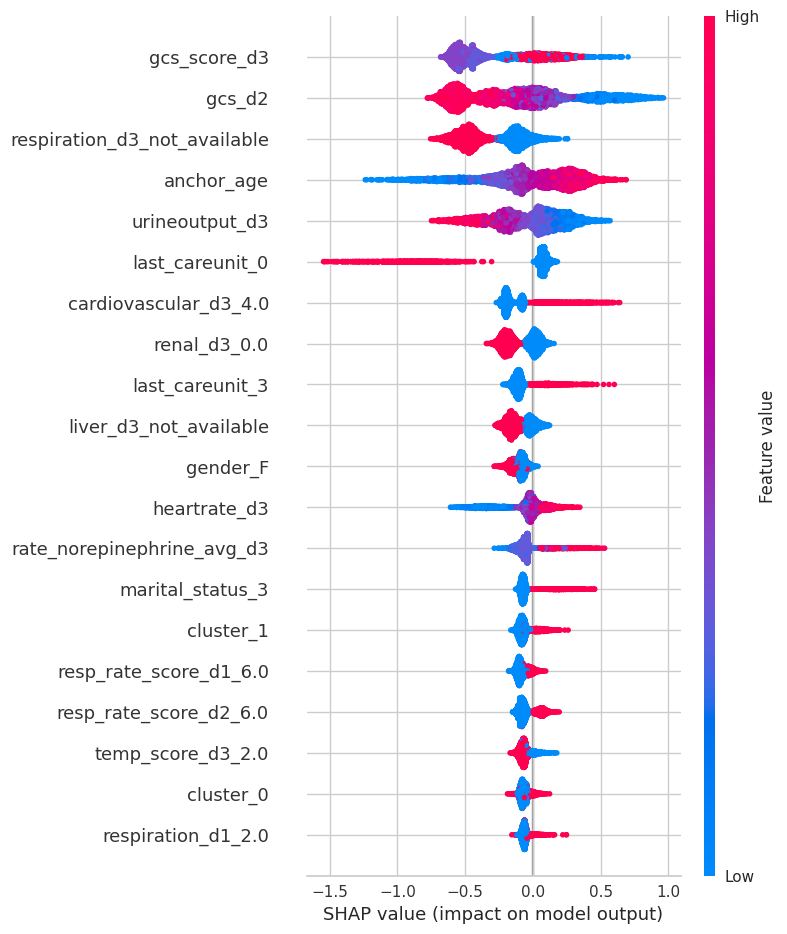

In [19]:
interpret_model(lgbm)

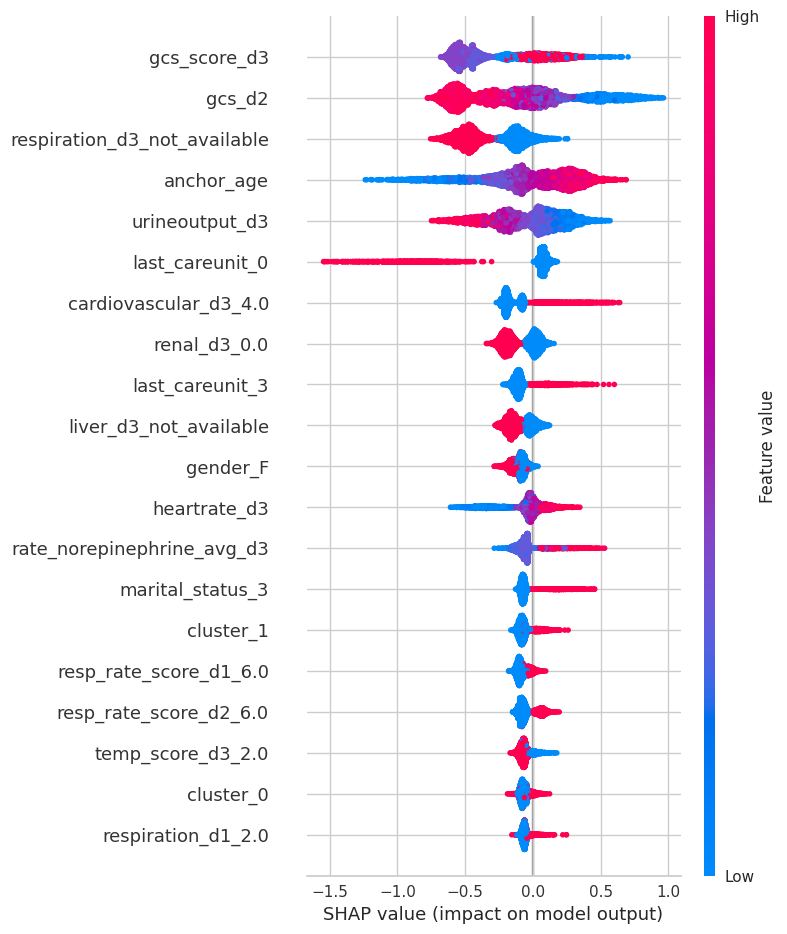

In [20]:
interpret_model(lgbm, plot='summary')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


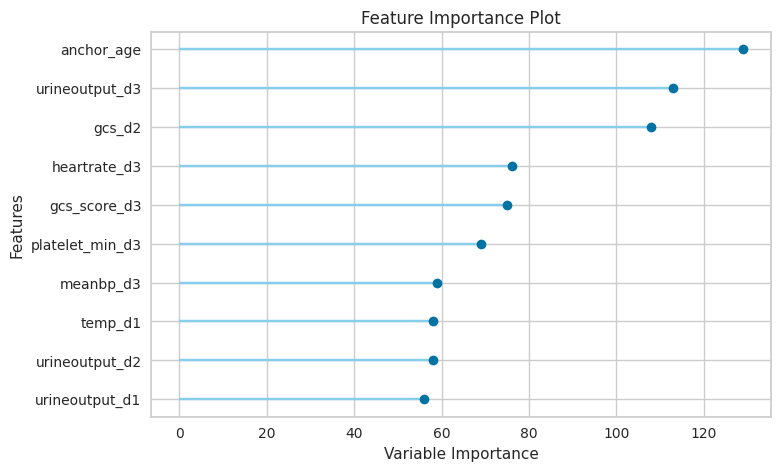

In [21]:
plot_model(lgbm, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


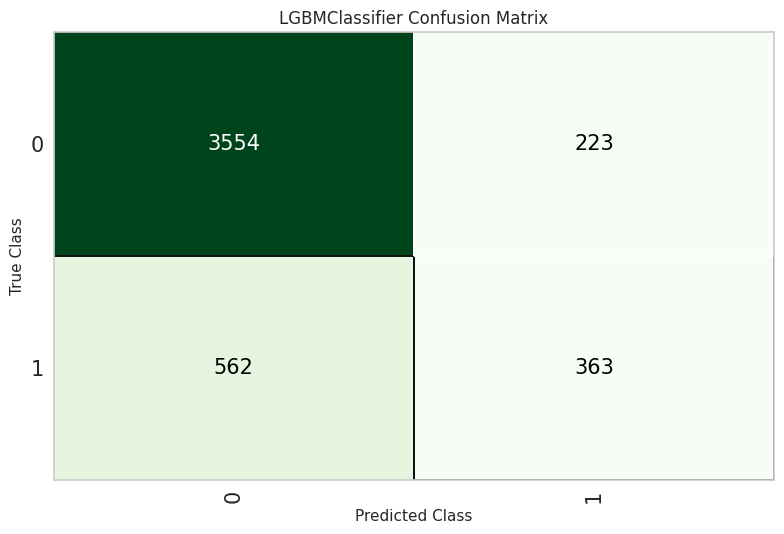

In [22]:
plot_model(lgbm, plot = 'confusion_matrix')

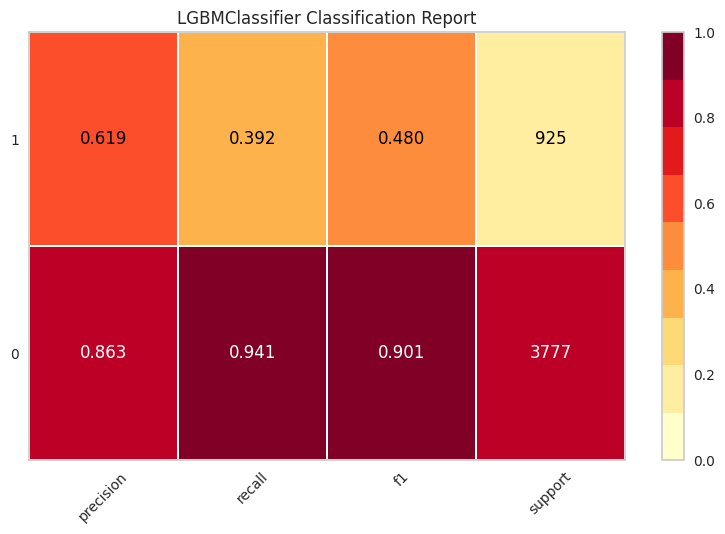

In [23]:
plot_model(lgbm, plot = 'class_report')

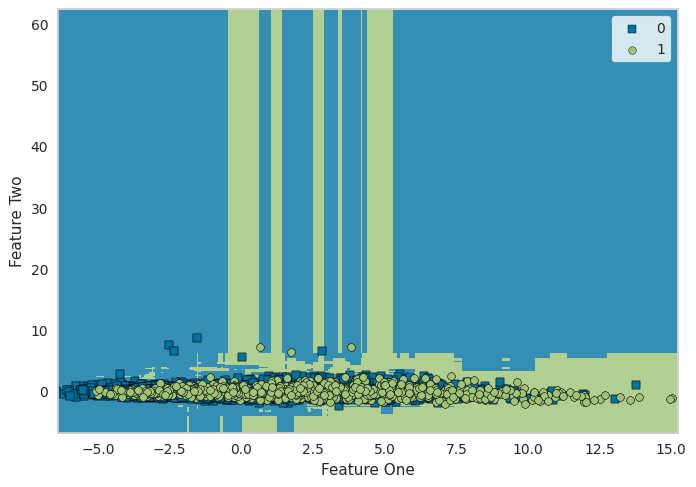

In [24]:
plot_model(lgbm, plot='boundary')

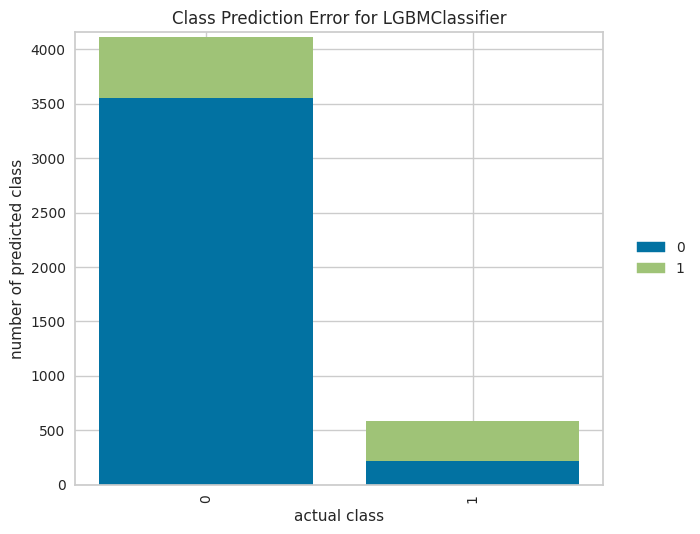

In [25]:
plot_model(lgbm, plot = 'error')

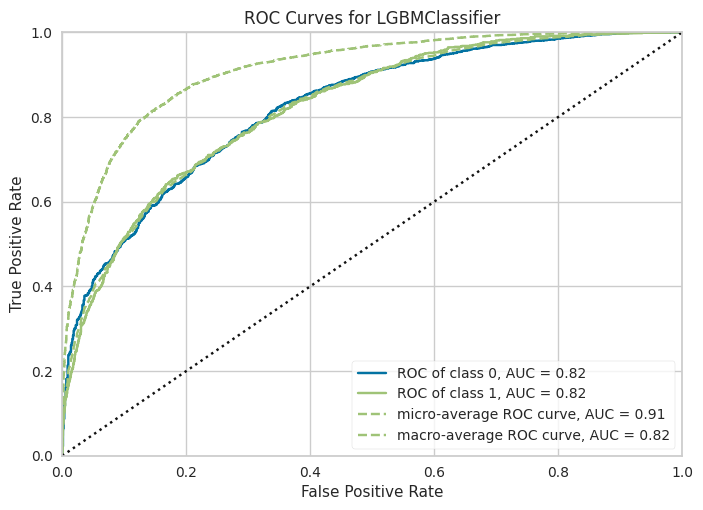

In [26]:
plot_model(lgbm, plot='auc')

In [27]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8330,0.8229,0.3924,0.6195,0.4805,0.3869,0.4012


,race,anchor_age,anchor_year,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,...,temp_score_d3_not_available,urineoutput_score_d3_0.0,urineoutput_score_d3_1.0,urineoutput_score_d3_10.0,urineoutput_score_d3_5.0,urineoutput_score_d3_8.0,urineoutput_score_d3_not_available,hospital_expire_flag,Label,Score
0,22.0,66.0,2180.0,220.000000,244.375000,0.030128,0.111938,6.362787,3.973153,211.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9275
1,22.0,35.0,2117.0,220.000000,244.375000,0.030128,0.107191,6.362787,3.973153,63.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5402
2,28.0,88.0,2122.0,220.000000,244.375000,0.030128,0.107191,6.362787,3.973153,185.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9522
3,28.0,57.0,2142.0,295.000000,244.375000,0.030128,0.140934,6.362787,3.973153,63.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9303
4,7.0,66.0,2195.0,220.000000,148.000000,0.030128,0.192598,6.362787,3.973153,105.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.6126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,27.0,37.0,2114.0,220.000000,496.666656,0.030128,0.107191,6.362787,3.973153,104.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9714
4698,28.0,68.0,2126.0,220.000000,25.000000,0.030128,0.107191,6.362787,3.973153,114.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9518
4699,7.0,59.0,2117.0,408.333344,244.375000,0.030128,0.107191,6.362787,3.973153,86.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9659
4700,5.0,77.0,2173.0,220.000000,244.375000,0.030128,0.107191,6.362787,3.973153,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7702


In [29]:
final_lgbm = finalize_model(lgbm)

In [30]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [31]:
save_model(lgbm, "models/lgbm_sepsis_cluster")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hospital_expire_flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/pycaret/internal/pipeline.py", line 118, in fit
    result = super().fit(X, y=y, **fit_kwargs)
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/

In [ ]:
# new_prediction = predict_model(Final Model, data=data_unseen)
# new_prediction.head()

In [ ]:
# saved_final_model = load_model('Final Model')

In [ ]:
import matplotlib.pyplot as plt
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
names = [x[0] for x in imp]
values = [x[1] for x in imp]
plt.barh(names[:5], values[:5])

In [ ]:
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
print("\n".join([": ".join([x[0], str(round(x[1], 4))]) for x in imp]))

In [ ]:
file_path
with open(file_path, 'w') as f: